In [1]:
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict

plt.rcParams['figure.figsize'] = [16, 68]
from plot_utils import *

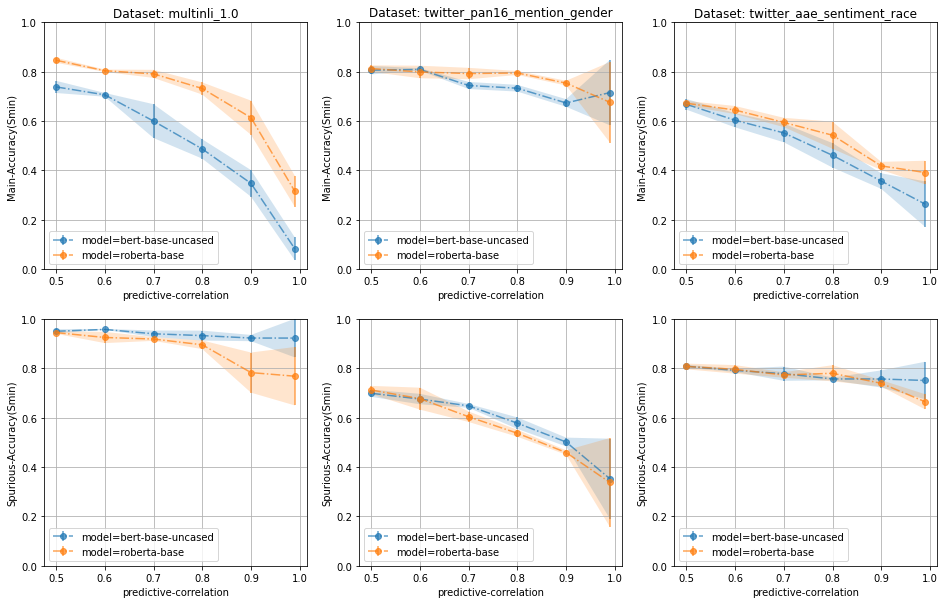

In [23]:
#Getting the pdict for each of the three dataset
run_list=[1,2,3]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
plt.rcParams['figure.figsize'] = [16, 10]
plot_item_list = [
                    "topic0_smin",
                    "main_smin_topic0"
]
plot_item_custname = [ 
                    "Main-Accuracy(Smin)",
                    "Spurious-Accuracy(Smin)"
]


ax=None

#Other hyperparam
model_type="bert-base-uncased"
neg1_flip_method="remove_negation"
lt="x_entropy"
drate=0.0
l2=0.0
hretrain="no_warm_encoder"
d="non_causal"
n=0.0
h=0
e=20
s=10000


model_type_list=["bert-base-uncased","roberta-base"]
dataset_list = ["multinli_1.0","twitter_pan16_mention_gender","twitter_aae_sentiment_race"]

all_result_dict = defaultdict(dict)
for dataset in dataset_list:
    for model_type in model_type_list:
        if dataset == "twitter_aae_sentiment_race" and model_type=="bert-base-uncased":
            neg1_flip_method = "replace_negation"
        else:
            neg1_flip_method = "remove_negation"
        try:
            result_dict = get_all_result_dict(run_list=run_list,
                                                  pval_list=pval_list,
                                                  enum=e,
                                                  fname_pattern="dataset/{}/nlp_logs/pt.rel.model_type({}).neg1_fmethod({}).lt({}).dropout_rate({}).l2({}).noise({}).hlayer({}).sample({}).epoch({}).pval({}).rnum({})/probe_metric_list.json".format(
                                                                                      dataset,
                                                                                      model_type,
                                                                                      neg1_flip_method,
                                                                                      lt,
                                                                                      drate,
                                                                                      l2,
                                                                                      n,
                                                                                      h,
                                                                                      s,
                                                                                      e,
                                                                                      "{}",
                                                                                      "{}",
                                              )
            )
        except:
            result_dict = None
        all_result_dict[dataset][model_type]=result_dict

conv_all_result_dict = all_result_dict.copy()
# print(all_result_dict)
#Now plotting all the reuslt in one single frame
fig,ax = plt.subplots(len(plot_item_list),len(all_result_dict))
for pidx,(item_name,pname) in enumerate(zip(plot_item_list,plot_item_custname)):
    for didx,(dataset,dset_result_dict) in enumerate(all_result_dict.items()):
        for model_type in model_type_list:
            #print(result_dict)
            result_dict=dset_result_dict[model_type]
            if result_dict==None:
                continue
            
            yval = [result_dict[pval][item_name]["mean"] for pval in pval_list]
            yerr = [result_dict[pval][item_name]["std"] for pval in pval_list]
            ylb = [
                result_dict[pval][item_name]["mean"]-result_dict[pval][item_name]["std"]
                    for pval in pval_list
            ]
            yub = [ 
                result_dict[pval][item_name]["mean"]+result_dict[pval][item_name]["std"]
                    for pval in pval_list
            ]
            #Plotting the guy
            ax[pidx,didx].errorbar(pval_list,yval,yerr,label="model={}".format(model_type),ls="-.",marker="o",alpha=0.7)
            ax[pidx,didx].fill_between(pval_list,ylb,yub,alpha=0.2)


            #Setting the plot attributes
            ax[pidx,didx].set_ylim(0.0,1.0)
            ax[pidx,didx].set_xlabel("predictive-correlation")
            ax[pidx,didx].set_ylabel(pname)



            ax[pidx,didx].legend(loc=3)
            ax[pidx,didx].grid(True)
            if pidx==0:
                ax[pidx,didx].set_title("Dataset: {}".format(dataset))
plt.show()

# Plotting for the Adv Removal

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

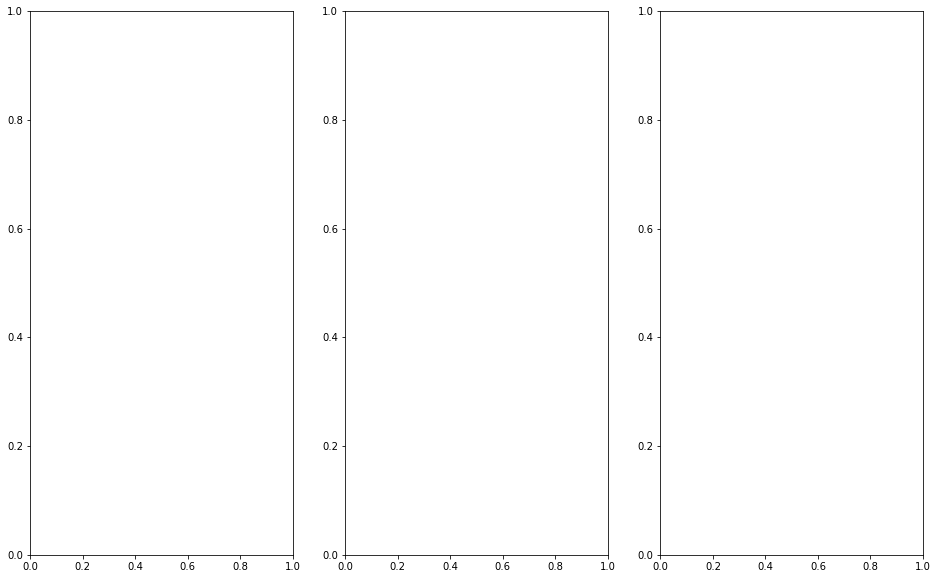

In [4]:
#Getting the pdict for each of the three dataset
run_list=[1,2,3]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
plt.rcParams['figure.figsize'] = [16, 10]
ax=None


#Getting the clean classifier's smin accuracy
lt="x_entropy"
drate=0.0
l2=0.0
hretrain="no_warm_encoder"
mainmode="causal_same_sp" #causal_same_sp, causal_rebalance_sp
n=0.0
h=0
mainepoch=6
s=10000
model_type="roberta-base"
remmode="null_space"
advepoch=20
topicepoch=1
neg1_flip_method="remove_negation"
# dataset = "twitter_pan16_mention_gender" # "multinli_1.0", "twitter_pan16_mention_gender" , "twitter_aae_sentiment_race"
clean_pval=0.5
model_type_list=["roberta-base"]
dataset_list = ["multinli_1.0","twitter_pan16_mention_gender","twitter_aae_sentiment_race"]


clean_result_dict=defaultdict(dict)
for dataset in dataset_list:
    for model_type in model_type_list:
        result_dict = get_all_result_dict(run_list=run_list,
                                              pval_list=pval_list,
                                              enum=mainepoch,
                                              fname_pattern="dataset/{}/nlp_logs/pt.rel.mt({}).neg1_fmethod({}).remmode({}).mainmode({}).advepoch({}).topicepoch({}).lt({}).drate({}).l2({}).n({}).h({}).s({}).e({}).p({}).r({})/probe_metric_list.json".format(
                                                                                      dataset,
                                                                                      model_type,
                                                                                      neg1_flip_method,
                                                                                      remmode,
                                                                                      mainmode,
                                                                                      advepoch,
                                                                                      topicepoch,
                                                                                      lt,
                                                                                      drate,
                                                                                      l2,
                                                                                      n,
                                                                                      h,
                                                                                      s,
                                                                                      mainepoch,
                                                                                      "{}",
                                                                                      "{}",
                                              )
        )
        #Now getting the smin acc from this clean classifier
        clean_smin_acc_list_dict=dict(
                    topic0_smin=result_dict[clean_pval]["topic0_smin"]["val_list"],
                    main_smin_topic0=result_dict[clean_pval]["main_smin_topic0"]["val_list"]
        )
        
        #Saving the result
        clean_result_dict[dataset][model_type]=clean_smin_acc_list_dict


#Other hyperparam
all_result_dict = defaultdict(dict)
e=20
for dataset in dataset_list:
    for model_type in model_type_list:
        if dataset == "twitter_aae_sentiment_race" and model_type=="bert-base-uncased":
            neg1_flip_method = "replace_negation"
        else:
            neg1_flip_method = "remove_negation"
#         try:
        result_dict = get_all_result_dict(run_list=run_list,
                                              pval_list=pval_list,
                                              enum=e,
                                              fname_pattern="dataset/{}/nlp_logs/pt.rel.model_type({}).neg1_fmethod({}).lt({}).dropout_rate({}).l2({}).noise({}).hlayer({}).sample({}).epoch({}).pval({}).rnum({})/probe_metric_list.json".format(
                                                                                  dataset,
                                                                                  model_type,
                                                                                  neg1_flip_method,
                                                                                  lt,
                                                                                  drate,
                                                                                  l2,
                                                                                  n,
                                                                                  h,
                                                                                  s,
                                                                                  e,
                                                                                  "{}",
                                                                                  "{}",
                                          ),
                                          clean_smin_acc_list_dict=clean_result_dict[dataset][model_type],
        )
#         except:
#             result_dict = None
        all_result_dict[dataset][model_type]=result_dict

conv_all_result_dict = all_result_dict.copy()





#Other hyperparam
plot_item_list = [
                    "topic0_smin_sp_score",
]
plot_item_custname = [ 
                    "Main Classifier Spuriousness Score",
]

adv_rm_method="adv_rm_with_main"
advepoch=20
remmode="adversarial"


grstrength_dict={
            "multinli_1.0":{
                "bert-base-uncased":0.01,
                "roberta-base":0.001,
             },
            "twitter_pan16_mention_gender":{
                "bert-base-uncased":0.1,
                "roberta-base":0.1,#need rerun
             },
            "twitter_aae_sentiment_race":{
                "bert-base-uncased":0.1,
                "roberta-base":0.001,
             }
    
                
}

all_result_dict = defaultdict(dict)
for dataset in dataset_list:
    for model_type in model_type_list:
        if dataset == "twitter_aae_sentiment_race" and model_type=="bert-base-uncased":
            neg1_flip_method = "replace_negation"
        else:
            neg1_flip_method = "remove_negation"
        
        grstrength=grstrength_dict[dataset][model_type]
        
#         try:
        result_dict = get_all_result_dict(run_list=run_list,
                                      pval_list=pval_list,
                                      enum=advepoch,
                                      fname_pattern="dataset/{}/nlp_logs/pt.rel.mt({}).neg1_fmethod({}).remmode({}).adv_rm_method({}).grstrength({}).advepoch({}).lt({}).drate({}).l2({}).n({}).h({}).s({}).p({}).r({})/probe_metric_list.json".format(
                                                                          dataset,
                                                                          model_type,
                                                                          neg1_flip_method,
                                                                          remmode,
                                                                          adv_rm_method,
                                                                          grstrength,
                                                                          advepoch,
                                                                          lt,
                                                                          drate,
                                                                          l2,
                                                                          n,
                                                                          h,
                                                                          s,
                                                                          "{}",
                                                                          "{}",
                                  ),
                                  clean_smin_acc_list_dict=clean_result_dict[dataset][model_type],
        )
#         except:
#             result_dict = None
        all_result_dict[dataset][model_type]=result_dict

adv_all_result_dict = all_result_dict.copy()
# print(all_result_dict)
#Now plotting all the reuslt in one single frame
fig,ax = plt.subplots(len(plot_item_list),len(all_result_dict))
for pidx,(item_name,pname) in enumerate(zip(plot_item_list,plot_item_custname)):
    for didx,(dataset,dset_result_dict) in enumerate(all_result_dict.items()):
        for model_type in model_type_list:
            #print(result_dict)
            adv_result_dict=adv_all_result_dict[dataset][model_type]
            conv_result_dict=conv_all_result_dict[dataset][model_type]
            
            for dict_name,result_dict in [("adv",adv_result_dict),("conv",conv_result_dict)]:
                if result_dict==None:
                    continue

                yval = [result_dict[pval][item_name]["mean"] for pval in pval_list]
                yerr = [result_dict[pval][item_name]["std"] for pval in pval_list]
                ylb = [
                    result_dict[pval][item_name]["mean"]-result_dict[pval][item_name]["std"]
                        for pval in pval_list
                ]
                yub = [ 
                    result_dict[pval][item_name]["mean"]+result_dict[pval][item_name]["std"]
                        for pval in pval_list
                ]
                #Plotting the guy
                ax[pidx,didx].errorbar(pval_list,yval,yerr,label="{}: model={}".format(dict_name,model_type),ls="-.",marker="o",alpha=0.7)
                ax[pidx,didx].fill_between(pval_list,ylb,yub,alpha=0.2)


                #Setting the plot attributes
                ax[pidx,didx].set_ylim(0.0,1.0)
                ax[pidx,didx].set_xlabel("predictive-correlation")
                ax[pidx,didx].set_ylabel(pname)



                ax[pidx,didx].legend(loc=3)
                ax[pidx,didx].grid(True)
                if pidx==0:
                    ax[pidx,didx].set_title("Dataset: {}".format(dataset))
plt.show()

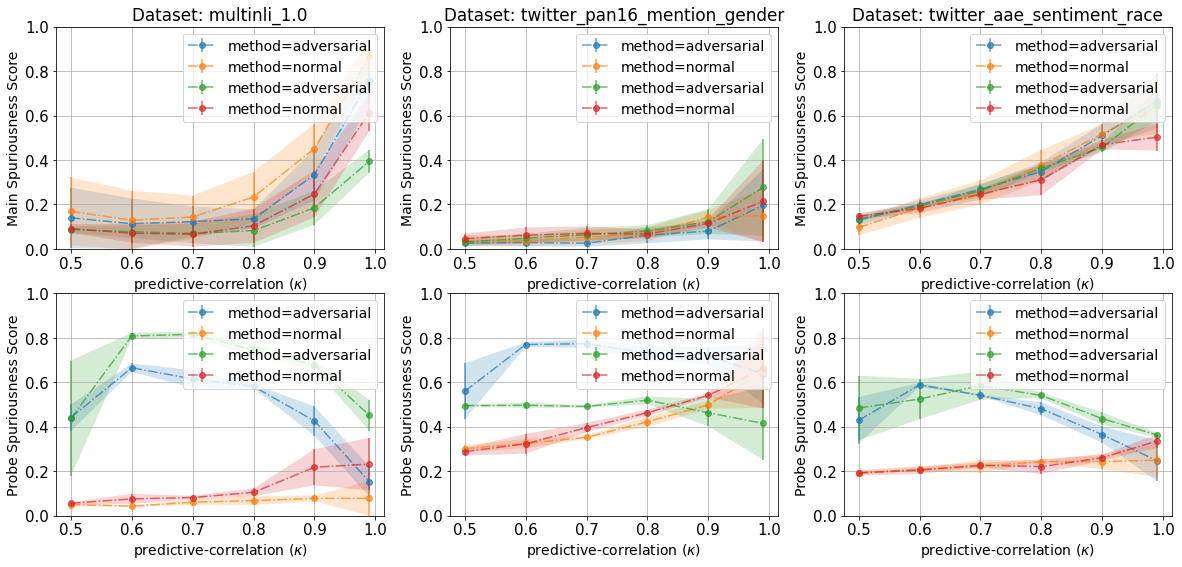

In [23]:
#Getting the pdict for each of the three dataset
run_list=[1,2,3]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
plt.rcParams['figure.figsize'] = [20, 9]
ax=None


#Getting the clean classifier's smin accuracy
lt="x_entropy"
drate=0.0
l2=0.0
hretrain="no_warm_encoder"
mainmode="causal_same_sp" #causal_same_sp, causal_rebalance_sp
n=0.0
h=0
mainepoch=6
s=10000
model_type="roberta-base"
remmode="null_space"
advepoch=20
topicepoch=1
neg1_flip_method="remove_negation"
# dataset = "twitter_pan16_mention_gender" # "multinli_1.0", "twitter_pan16_mention_gender" , "twitter_aae_sentiment_race"
clean_pval=0.5
model_type_list=["bert-base-uncased","roberta-base"]
dataset_list = ["multinli_1.0","twitter_pan16_mention_gender","twitter_aae_sentiment_race"]


clean_result_dict=defaultdict(dict)
for dataset in dataset_list:
    for model_type in model_type_list:
        result_dict = get_all_result_dict(run_list=run_list,
                                              pval_list=pval_list,
                                              enum=mainepoch,
                                              fname_pattern="dataset/{}/nlp_logs/pt.rel.mt({}).neg1_fmethod({}).remmode({}).mainmode({}).advepoch({}).topicepoch({}).lt({}).drate({}).l2({}).n({}).h({}).s({}).e({}).p({}).r({})/probe_metric_list.json".format(
                                                                                      dataset,
                                                                                      model_type,
                                                                                      neg1_flip_method,
                                                                                      remmode,
                                                                                      mainmode,
                                                                                      advepoch,
                                                                                      topicepoch,
                                                                                      lt,
                                                                                      drate,
                                                                                      l2,
                                                                                      n,
                                                                                      h,
                                                                                      s,
                                                                                      mainepoch,
                                                                                      "{}",
                                                                                      "{}",
                                              )
        )
        #Now getting the smin acc from this clean classifier
        clean_smin_acc_list_dict=dict(
                    topic0_smin=result_dict[clean_pval]["topic0_smin"]["val_list"],
                    main_smin_topic0=result_dict[clean_pval]["main_smin_topic0"]["val_list"]
        )
        
        #Saving the result
        clean_result_dict[dataset][model_type]=clean_smin_acc_list_dict


#Other hyperparam
all_result_dict = defaultdict(dict)
e=20
for dataset in dataset_list:
    for model_type in model_type_list:
        if dataset == "twitter_aae_sentiment_race" and model_type=="bert-base-uncased":
            neg1_flip_method = "replace_negation"
        else:
            neg1_flip_method = "remove_negation"
#         try:
        result_dict = get_all_result_dict(run_list=run_list,
                                              pval_list=pval_list,
                                              enum=e,
                                              fname_pattern="dataset/{}/nlp_logs/pt.rel.model_type({}).neg1_fmethod({}).lt({}).dropout_rate({}).l2({}).noise({}).hlayer({}).sample({}).epoch({}).pval({}).rnum({})/probe_metric_list.json".format(
                                                                                  dataset,
                                                                                  model_type,
                                                                                  neg1_flip_method,
                                                                                  lt,
                                                                                  drate,
                                                                                  l2,
                                                                                  n,
                                                                                  h,
                                                                                  s,
                                                                                  e,
                                                                                  "{}",
                                                                                  "{}",
                                          ),
                                          clean_smin_acc_list_dict=clean_result_dict[dataset][model_type],
        )
#         except:
#             result_dict = None
        all_result_dict[dataset][model_type]=result_dict

conv_all_result_dict = all_result_dict.copy()





#Other hyperparam
plot_item_list = [
                    "topic0_smin_sp_score",
                    "main_smin_topic0_sp_score",
]
plot_item_custname = [ 
                    "Main Spuriousness Score",
                    "Probe Spuriousness Score"
]

adv_rm_method="adv_rm_with_main"
advepoch=20
remmode="adversarial"


grstrength_dict={
            "multinli_1.0":{
                "bert-base-uncased":0.01,
                "roberta-base":0.001,
             },
            "twitter_pan16_mention_gender":{
                "bert-base-uncased":0.1,
                "roberta-base":0.1,#need rerun
             },
            "twitter_aae_sentiment_race":{
                "bert-base-uncased":0.01,
                "roberta-base":0.001,
             }
    
                
}

all_result_dict = defaultdict(dict)
neg1_flip_method = "remove_negation"
for dataset in dataset_list:
    for model_type in model_type_list:
#         if dataset == "twitter_aae_sentiment_race" and model_type=="bert-base-uncased":
#             neg1_flip_method = "replace_negation"
#         else:
#             neg1_flip_method = "remove_negation"
        
        grstrength=grstrength_dict[dataset][model_type]
        
#         try:
        result_dict = get_all_result_dict(run_list=run_list,
                                      pval_list=pval_list,
                                      enum=advepoch,
                                      fname_pattern="dataset/{}/nlp_logs/pt.rel.mt({}).neg1_fmethod({}).remmode({}).adv_rm_method({}).grstrength({}).advepoch({}).lt({}).drate({}).l2({}).n({}).h({}).s({}).p({}).r({})/probe_metric_list.json".format(
                                                                          dataset,
                                                                          model_type,
                                                                          neg1_flip_method,
                                                                          remmode,
                                                                          adv_rm_method,
                                                                          grstrength,
                                                                          advepoch,
                                                                          lt,
                                                                          drate,
                                                                          l2,
                                                                          n,
                                                                          h,
                                                                          s,
                                                                          "{}",
                                                                          "{}",
                                  ),
                                  clean_smin_acc_list_dict=clean_result_dict[dataset][model_type],
        )
#         except:
#             result_dict = None
        all_result_dict[dataset][model_type]=result_dict

adv_all_result_dict = all_result_dict.copy()
# print(all_result_dict)


matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
plt.rcParams.update({'font.size': 14})


#Now plotting all the reuslt in one single frame
fig,ax = plt.subplots(len(plot_item_list),len(all_result_dict))
for pidx,(item_name,pname) in enumerate(zip(plot_item_list,plot_item_custname)):
    for didx,(dataset,dset_result_dict) in enumerate(all_result_dict.items()):
        for model_type in model_type_list:
            #print(result_dict)
            adv_result_dict=adv_all_result_dict[dataset][model_type]
            conv_result_dict=conv_all_result_dict[dataset][model_type]
            
            for dict_name,result_dict in [("adversarial",adv_result_dict),("normal",conv_result_dict)]:
                if result_dict==None:
                    continue

                yval = [result_dict[pval][item_name]["mean"] for pval in pval_list]
                yerr = [result_dict[pval][item_name]["std"] for pval in pval_list]
                ylb = [
                    result_dict[pval][item_name]["mean"]-result_dict[pval][item_name]["std"]
                        for pval in pval_list
                ]
                yub = [ 
                    result_dict[pval][item_name]["mean"]+result_dict[pval][item_name]["std"]
                        for pval in pval_list
                ]
                #Plotting the guy
                ax[pidx,didx].errorbar(pval_list,yval,yerr,label="method={}".format(dict_name,model_type),ls="-.",marker="o",alpha=0.7)
                ax[pidx,didx].fill_between(pval_list,ylb,yub,alpha=0.2)


                #Setting the plot attributes
                ax[pidx,didx].set_ylim(0.0,1.0)
                ax[pidx,didx].set_xlabel("predictive-correlation ($\kappa$)")
                ax[pidx,didx].set_ylabel(pname)



                ax[pidx,didx].legend(loc=1)
                ax[pidx,didx].grid(True)
                if pidx==0:
                    ax[pidx,didx].set_title("Dataset: {}".format(dataset))
plt.show()

# Plotting the Null-Space Removal Results

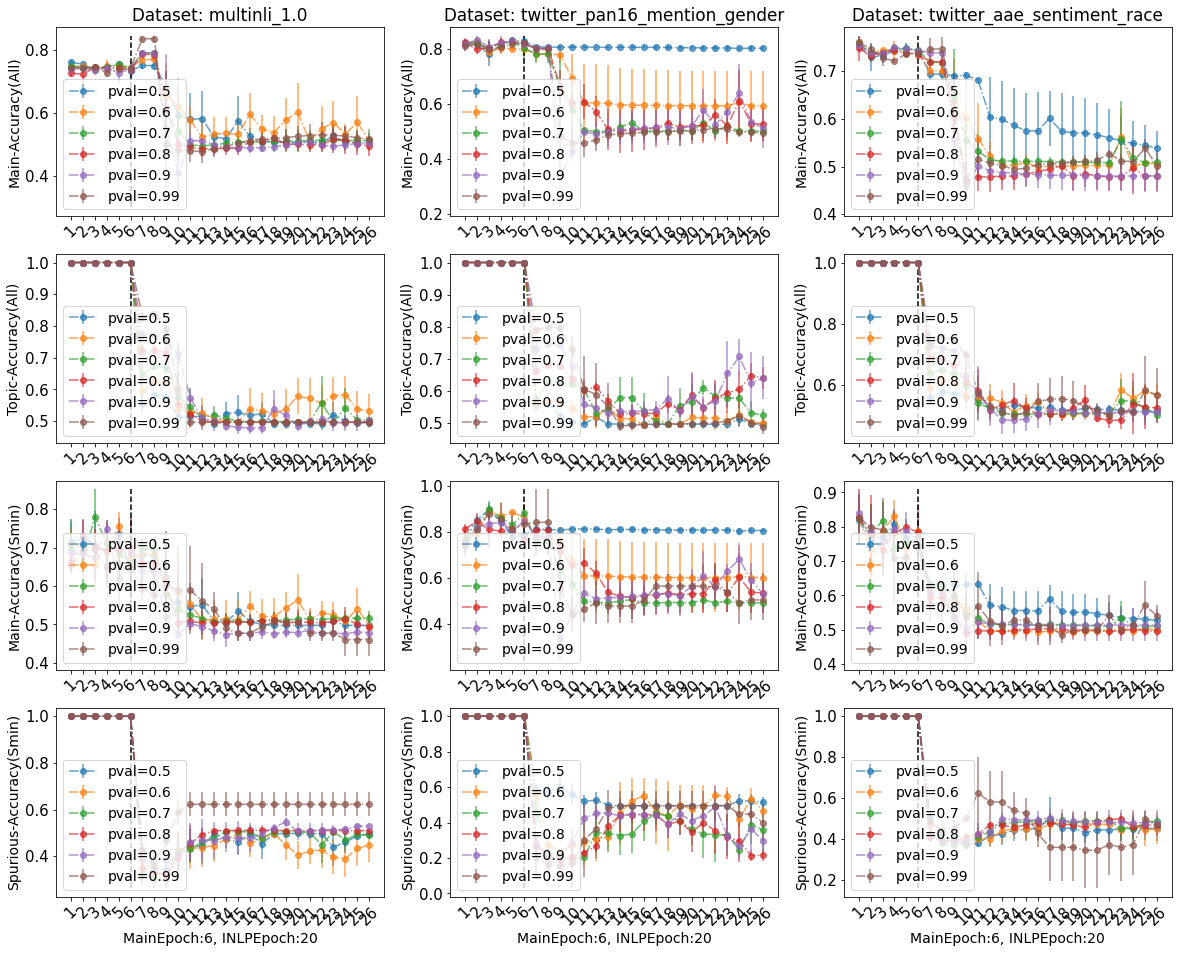

In [24]:
run_list=[1,2,3]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
plot_item_list = [
                    "angle:m-t0",
                    "acc:main",
                    "acc:topic0",
                    "main_smin_topic0",
                    "topic0_smin",
                    "topic0_main",
                    "topic0_pdelta_m1t1",
                    "topic0_pdelta_m1t0",
                    "topic0_pdelta_m0t1",
                    "topic0_pdelta_m0t0",
                    "topic0_pdelta_smin",
                    "topic0_pdelta_all",
                    "topic0_logpdelta",
]
plt.rcParams['figure.figsize'] = [20, 16]
plot_item_list = [
                    "acc:main",
                    "acc:topic0",
                    "topic0_smin",
                    "main_smin_topic0"
]
plot_item_custname = [ 
                    "Main-Accuracy(All)",
                    "Topic-Accuracy(All)",
                    "Main-Accuracy(Smin)",
                    "Spurious-Accuracy(Smin)"
]


ax=None

#Other hyperparam
lt="x_entropy"
drate=0.0
l2=0.0
hretrain="no_warm_encoder"
mainmode="causal"
n=0.0
h=0
mainepoch=6
s=10000
mainmode="causal_same_sp"

model_type="bert-base-uncased"
remmode="null_space"
advepoch=20
topicepoch=1
neg1_flip_method="remove_negation"


model_type_list=["bert-base-uncased","roberta-base",]
dataset_list = ["multinli_1.0","twitter_pan16_mention_gender","twitter_aae_sentiment_race"]

all_result_dict = defaultdict(dict)
for dataset in dataset_list:
    for model_type in model_type_list:
        if dataset == "twitter_aae_sentiment_race" and model_type=="bert-base-uncased":
            neg1_flip_method = "remove_negation"
        else:
            neg1_flip_method = "remove_negation"
        
        try:
            result_dict = get_all_result_timeline(run_list=run_list,
                                                  pval_list=pval_list,
                                                  fname_pattern="dataset/{}/nlp_logs/pt.rel.mt({}).neg1_fmethod({}).remmode({}).mainmode({}).advepoch({}).topicepoch({}).lt({}).drate({}).l2({}).n({}).h({}).s({}).e({}).p({}).r({})/probe_metric_list.json".format(
                                                                                          dataset,
                                                                                          model_type,
                                                                                          neg1_flip_method,
                                                                                          remmode,
                                                                                          mainmode,
                                                                                          advepoch,
                                                                                          topicepoch,
                                                                                          lt,
                                                                                          drate,
                                                                                          l2,
                                                                                          n,
                                                                                          h,
                                                                                          s,
                                                                                          mainepoch,
                                                                                          "{}",
                                                                                          "{}",
                                                  )
            )
        except:
            result_dict=None
        all_result_dict[dataset][model_type]=result_dict
        
model_type="bert-base-uncased"       
fig,ax = plt.subplots(len(plot_item_list),len(all_result_dict))
for pidx,(item_name,pname) in enumerate(zip(plot_item_list,plot_item_custname)):
    for didx,(dataset,dset_result_dict) in enumerate(all_result_dict.items()):
        result_timeline = dset_result_dict[model_type]
        if result_timeline==None:
            continue
        
        min_yval = 1
        max_yval = 0
        for pval in pval_list:
            pdict_timeline = result_timeline[pval]

            x_val = range(1,len(pdict_timeline[item_name]["mean"])+1) #Denotes the number of epoch
            y_val = pdict_timeline[item_name]["mean"]
            y_err = pdict_timeline[item_name]["std"]
            if min(y_val-y_err)<min_yval:
                min_yval=min(y_val-y_err)
            if max(y_val+y_err)>max_yval:
                max_yval=max(y_val+y_err)


            ax[pidx,didx].errorbar(x_val,y_val,y_err,marker="o",ls="-.",label="pval={}".format(pval),alpha=0.7)
            


            
            
            
            ax[pidx,didx].set_ylabel(pname)
            ax[pidx,didx].set_xticks([val for val in x_val])
            ax[pidx,didx].set_xticklabels([str(val) for val in x_val],rotation=45)


            if pidx==1:
                ax[pidx,didx].legend(loc=3)
            else:
                ax[pidx,didx].legend(loc=3)
#             ax[pidx,didx].set_ylim(0.0,1.0)
#             ax[pidx,didx].grid(True)
            if pidx==0:
                ax[pidx,didx].set_title("Dataset: {}".format(dataset))
            if pidx==(len(plot_item_list)-1):
                ax[pidx,didx].set_xlabel("MainEpoch:{}, INLPEpoch:{}".format(mainepoch,advepoch))
            
        #Spearating the training and removal phase
        partition_yval = np.linspace(min_yval,max_yval,10)
        partition_xval = [mainepoch]*len(partition_yval)
#         print(partition_yval)
        ax[pidx,didx].plot(partition_xval,partition_yval,ls="--",color="k")

plt.show()

## Null-Space Result Real [with sp-score]

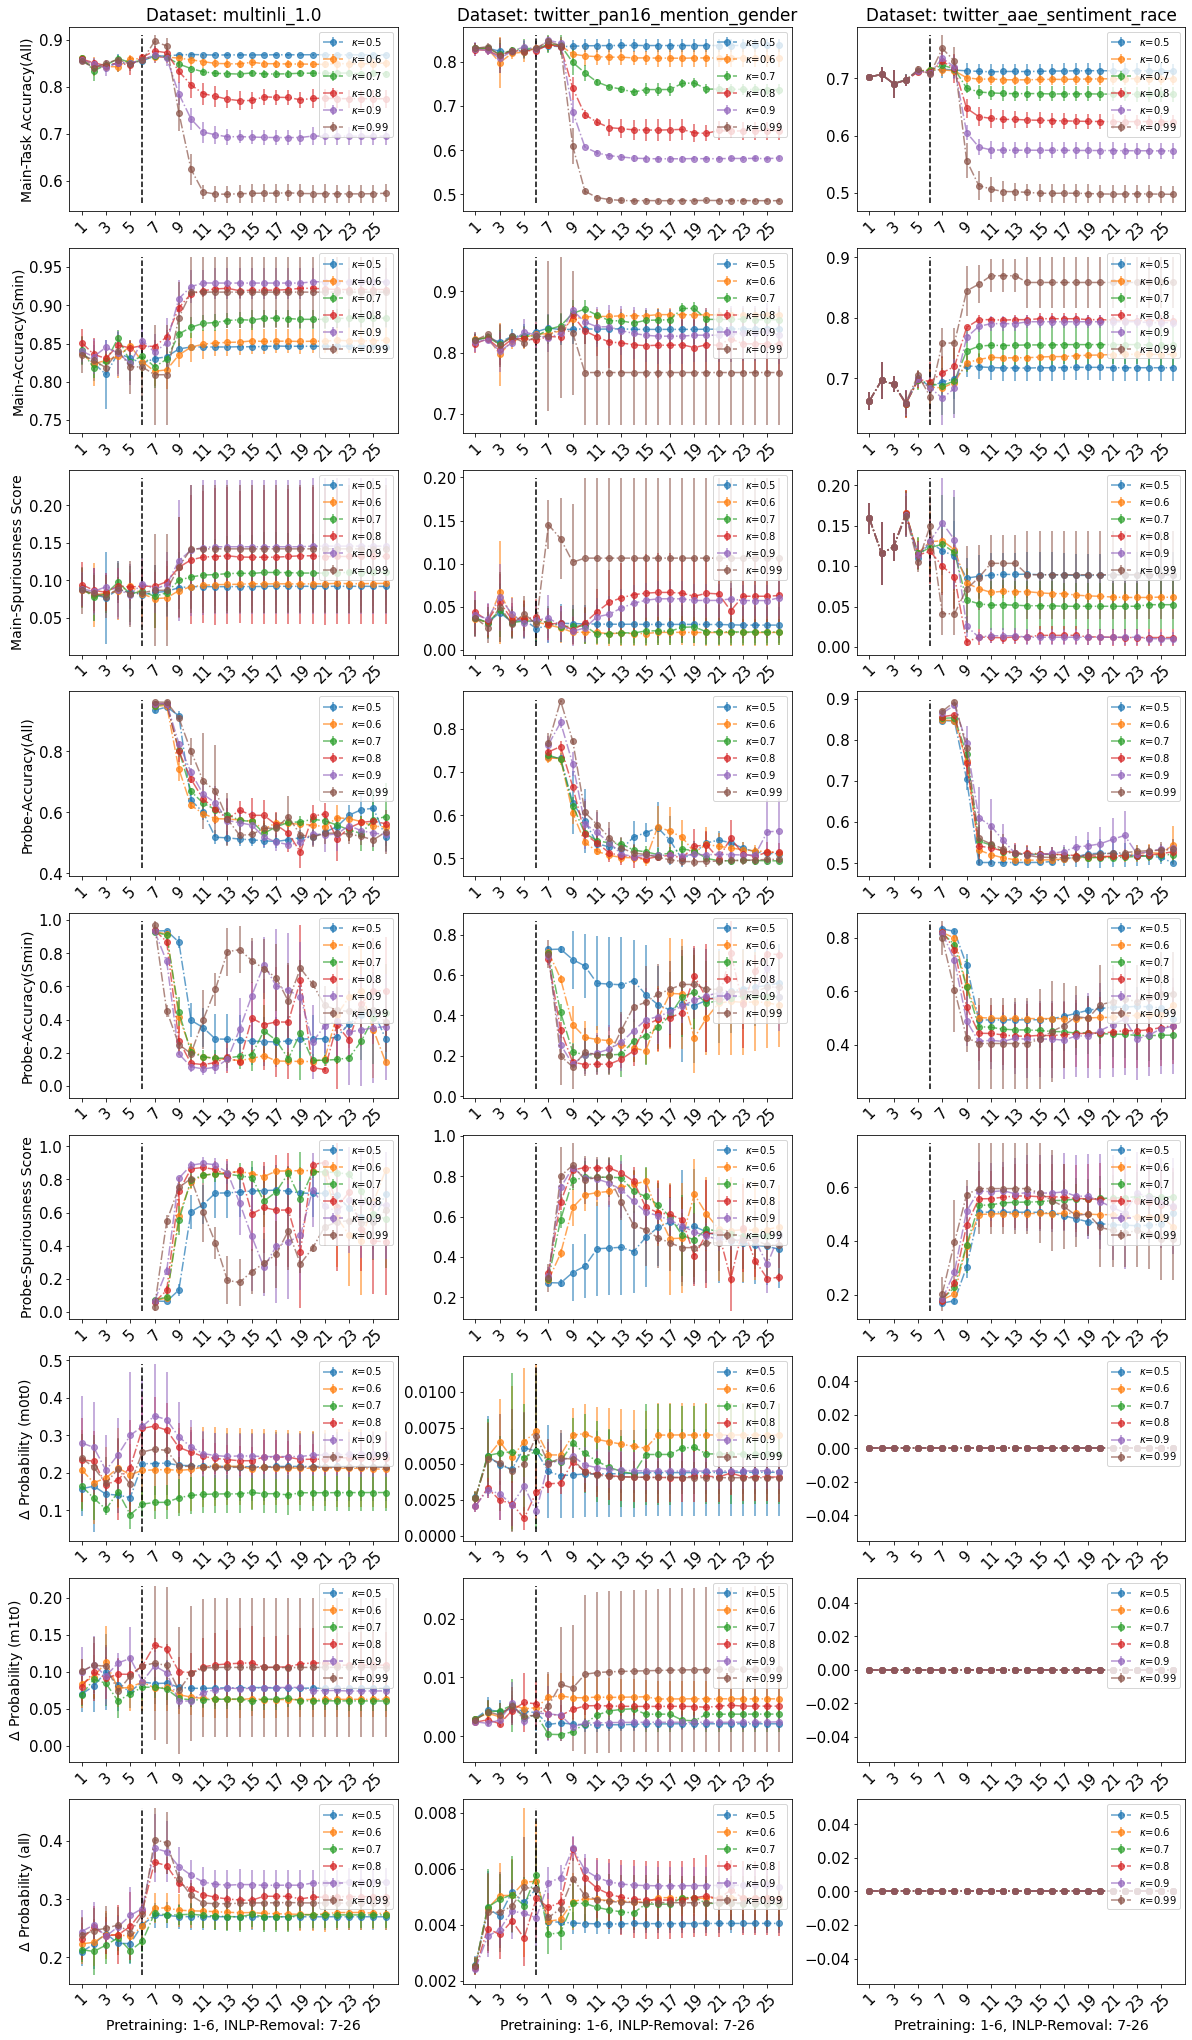

"\nOne way to explain this startification of the main-task accuracy is that, the invariant feature of the main \ntask became noisy enoughh to be now unpredictive of the topic and then the removal causes no harm to them.\nHence we see that more the correlate --> more it has to be noisy --> more the performance drops.\n\n\nBut why this wasn't observed in the bert-base model. Is it that the main feature corruption is happeing first in the ROBERTA?\n\n"

In [62]:
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
plt.rcParams.update({'font.size': 14})

run_list=[1,2,3]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
plot_item_list = [
                    "angle:m-t0",
                    "acc:main",
                    "acc:topic0",
                    "main_smin_topic0",
                    "topic0_smin",
                    "topic0_main",
                    "topic0_pdelta_m1t1",
                    "topic0_pdelta_m1t0",
                    "topic0_pdelta_m0t1",
                    "topic0_pdelta_m0t0",
                    "topic0_pdelta_smin",
                    "topic0_pdelta_all",
                    "topic0_logpdelta",
]

plot_item_list = [
                    "acc:main",
                    "topic0_smin",
                    "topic0_smin_sp_score",
                    "acc:topic0",
                    "main_smin_topic0",
                    "main_smin_topic0_sp_score",
                    "topic0_pdelta_m0t0",
                    "topic0_pdelta_m1t0",
                    "topic0_pdelta_all",
]
plot_item_custname = [ 
                    "Main-Task Accuracy(All)",
                    "Main-Accuracy(Smin)",
                    "Main-Spuriousness Score",
                    "Probe-Accuracy(All)",
                    "Probe-Accuracy(Smin)",
                    "Probe-Spuriousness Score",
                    "$\Delta$ Probability (m0t0)",
                    "$\Delta$ Probability (m1t0)",
                    "$\Delta$ Probability (all)",
]
plt.rcParams['figure.figsize'] = [20, 4*len(plot_item_list)]


ax=None

#Other hyperparam
lt="x_entropy"
drate=0.0
l2=0.0
hretrain="no_warm_encoder"
mainmode="causal_rebalance_sp"
n=0.0
h=0
mainepoch=6
s=10000

model_type="bert-base-uncased"
remmode="null_space"
advepoch=20
topicepoch=1
neg1_flip_method="remove_negation"


model_type_list=["bert-base-uncased","roberta-base",]
dataset_list = ["multinli_1.0","twitter_pan16_mention_gender","twitter_aae_sentiment_race"]

all_result_dict = defaultdict(dict)
for dataset in dataset_list:
    for model_type in model_type_list:      
#         try:
        result_dict = get_all_result_timeline(run_list=run_list,
                                              pval_list=pval_list,
                                              fname_pattern="dataset/{}/nlp_logs/pt.rel.mt({}).neg1_fmethod({}).remmode({}).mainmode({}).advepoch({}).topicepoch({}).lt({}).drate({}).l2({}).n({}).h({}).s({}).e({}).p({}).r({})/probe_metric_list.json".format(
                                                                              dataset,
                                                                              model_type,
                                                                              neg1_flip_method,
                                                                              remmode,
                                                                              mainmode,
                                                                              advepoch,
                                                                              topicepoch,
                                                                              lt,
                                                                              drate,
                                                                              l2,
                                                                              n,
                                                                              h,
                                                                              s,
                                                                              mainepoch,
                                                                              "{}",
                                                                              "{}",
                                              ),
                                              clean_smin_acc_list_dict=clean_result_dict[dataset][model_type],
        )
#         except:
#             result_dict=None
        all_result_dict[dataset][model_type]=result_dict
        
model_type="roberta-base"       
fig,ax = plt.subplots(len(plot_item_list),len(all_result_dict))
for pidx,(item_name,pname) in enumerate(zip(plot_item_list,plot_item_custname)):
    for didx,(dataset,dset_result_dict) in enumerate(all_result_dict.items()):
        result_timeline = dset_result_dict[model_type]
        if result_timeline==None:
            continue
        
        min_yval = 1
        max_yval = 0
        for pval in pval_list:
            pdict_timeline = result_timeline[pval]

            x_val = range(1,len(pdict_timeline[item_name]["mean"])+1) #Denotes the number of epoch
            y_val = pdict_timeline[item_name]["mean"]
            y_err = pdict_timeline[item_name]["std"]
            if min(y_val-y_err)<min_yval:
                min_yval=min(y_val-y_err)
            if max(y_val+y_err)>max_yval:
                max_yval=max(y_val+y_err)


            if "Probe" in pname:
                ax[pidx,didx].errorbar(x_val[mainepoch:],y_val[mainepoch:],y_err[mainepoch:],marker="o",ls="-.",label="$\kappa$={}".format(pval),alpha=0.7)
            else:
                ax[pidx,didx].errorbar(x_val,y_val,y_err,marker="o",ls="-.",label="$\kappa$={}".format(pval),alpha=0.7)


            
            
            ax[pidx,didx].set_xticks([val for val in x_val if val%2==1])
            ax[pidx,didx].set_xticklabels([str(val) for val in x_val if val%2==1],rotation=45)


            if pidx==1:
                ax[pidx,didx].legend(loc=1,prop={'size': 10})
            else:
                ax[pidx,didx].legend(loc=1,prop={'size': 10})
#             ax[pidx,didx].set_ylim(0.0,1.0)
#             ax[pidx,didx].grid(True)
            ax[pidx,didx].set_xlim(0,mainepoch+advepoch+1)
            if pidx==0:
                ax[pidx,didx].set_title("Dataset: {}".format(dataset))
            if didx==0:
                ax[pidx,didx].set_ylabel(pname)
            if pidx==(len(plot_item_list)-1):
                ax[pidx,didx].set_xlabel("Pretraining: 1-{}, INLP-Removal: {}-{}".format(mainepoch,mainepoch+1,mainepoch+advepoch))
            
        #Spearating the training and removal phase
        partition_yval = np.linspace(min_yval,max_yval,10)
        partition_xval = [mainepoch]*len(partition_yval)
#         print(partition_yval)
        ax[pidx,didx].plot(partition_xval,partition_yval,ls="--",color="k")

plt.show()

'''
One way to explain this startification of the main-task accuracy is that, the invariant feature of the main 
task became noisy enoughh to be now unpredictive of the topic and then the removal causes no harm to them.
Hence we see that more the correlate --> more it has to be noisy --> more the performance drops.


But why this wasn't observed in the bert-base model. Is it that the main feature corruption is happeing first in the ROBERTA?

'''

## Null-Space Result for Synthetic

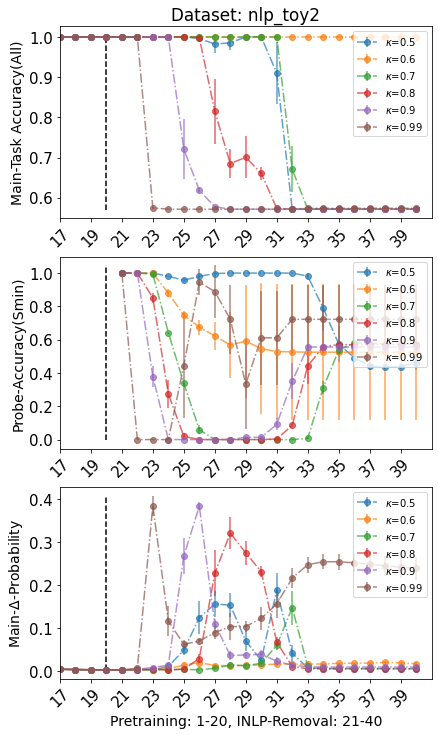

"\nOne way to explain this startification of the main-task accuracy is that, the invariant feature of the main \ntask became noisy enoughh to be now unpredictive of the topic and then the removal causes no harm to them.\nHence we see that more the correlate --> more it has to be noisy --> more the performance drops.\n\n\nBut why this wasn't observed in the bert-base model. Is it that the main feature corruption is happeing first in the ROBERTA?\n\n"

In [57]:
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
plt.rcParams.update({'font.size': 14})

run_list=[1,2,3]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
plot_item_list = [
                    "angle:m-t1",
                    "acc:main",
                    "acc:topic1",
                    "main_smin_topic1",
                    "topic1_smin",
                    "topic1_main",
                    "topic1_pdelta_m1t1",
                    "topic1_pdelta_m1t0",
                    "topic1_pdelta_m0t1",
                    "topic1_pdelta_m0t0",
                    "topic1_pdelta_smin",
                    "topic1_pdelta_all",
                    "topic1_logpdelta",
]

plot_item_list = [
                    "acc:main",
#                     "topic1_smin",
#                     "topic1_smin_sp_score",
#                     "acc:topic1",
                    "main_smin_topic1",
#                     "main_smin_topic1_sp_score",
#                     "topic1_pdelta_m0t0",
#                     "topic1_pdelta_m0t0",
                    "topic1_pdelta_all",
]
plot_item_custname = [ 
                    "Main-Task Accuracy(All)",
#                     "Main-Accuracy(Smin)",
#                     "Main-Spuriousness Score",
#                     "Probe-Accuracy(All)",
                    "Probe-Accuracy(Smin)",
#                     "Probe-Spuriousness Score",
#                     "$\Delta$ Probability (m0t0)",
#                     "$\Delta$ Probability (m1t0)",
                    "Main-$\Delta$-Probability",
]
plt.rcParams['figure.figsize'] = [6.66, 4*len(plot_item_list)]


ax=None

#Other hyperparam
lt="x_entropy"
drate=0.0
l2=0.0
hretrain="no_warm_encoder"
mainmode="causal"
n=0.0
h=0
mainepoch=20
s=1000

remmode="null_space"
advepoch=20
topicepoch=10
neg1_flip_method="remove_negation"


model_type_list=["nbow",]
dataset_list = ["nlp_toy2",]

all_result_dict = defaultdict(dict)
for dataset in dataset_list:
    for model_type in model_type_list:      
#         try:
        result_dict = get_all_result_timeline(run_list=run_list,
                                              pval_list=pval_list,
                                              fname_pattern="dataset/{}/nlp_logs/pt.rel.mt({}).neg1_fmethod({}).remmode({}).advepoch({}).topicepoch({}).lt({}).drate({}).l2({}).n({}).h({}).s({}).e({}).p({}).r({})/probe_metric_list.json".format(
                                                                              dataset,
                                                                              model_type,
                                                                              neg1_flip_method,
                                                                              remmode,
                                                                              advepoch,
                                                                              topicepoch,
                                                                              lt,
                                                                              drate,
                                                                              l2,
                                                                              n,
                                                                              h,
                                                                              s,
                                                                              mainepoch,
                                                                              "{}",
                                                                              "{}",
                                              ),
        )
#         except:
#             result_dict=None
        all_result_dict[dataset][model_type]=result_dict
        
model_type="nbow"       
fig,ax = plt.subplots(len(plot_item_list),len(all_result_dict))
for pidx,(item_name,pname) in enumerate(zip(plot_item_list,plot_item_custname)):
    for didx,(dataset,dset_result_dict) in enumerate(all_result_dict.items()):
        result_timeline = dset_result_dict[model_type]
        if result_timeline==None:
            continue
        
        min_yval = 1
        max_yval = 0
        for pval in pval_list:
            pdict_timeline = result_timeline[pval]

            x_val = range(1,len(pdict_timeline[item_name]["mean"])+1) #Denotes the number of epoch
            y_val = pdict_timeline[item_name]["mean"]
            y_err = pdict_timeline[item_name]["std"]
            if min(y_val-y_err)<min_yval:
                min_yval=min(y_val-y_err)
            if max(y_val+y_err)>max_yval:
                max_yval=max(y_val+y_err)


            if "Probe" in pname:
                ax[pidx,].errorbar(x_val[mainepoch:],y_val[mainepoch:],y_err[mainepoch:],marker="o",ls="-.",label="$\kappa$={}".format(pval),alpha=0.7)
            else:
                ax[pidx,].errorbar(x_val,y_val,y_err,marker="o",ls="-.",label="$\kappa$={}".format(pval),alpha=0.7)


            
            
            ax[pidx,].set_xticks([val for val in x_val if val%2==1])
            ax[pidx,].set_xticklabels([str(val) for val in x_val if val%2==1],rotation=45)


            if pidx==1:
                ax[pidx,].legend(loc=1,prop={'size': 10})
            else:
                ax[pidx,].legend(loc=1,prop={'size': 10})
#             ax[pidx,didx].set_ylim(0.0,1.0)
#             ax[pidx,didx].grid(True)
            ax[pidx,].set_xlim(mainepoch-3,mainepoch+advepoch+1)
            if pidx==0:
                ax[pidx,].set_title("Dataset: {}".format(dataset))
            if didx==0:
                ax[pidx,].set_ylabel(pname)
            if pidx==(len(plot_item_list)-1):
                ax[pidx,].set_xlabel("Pretraining: 1-{}, INLP-Removal: {}-{}".format(mainepoch,mainepoch+1,mainepoch+advepoch))
            
        #Spearating the training and removal phase
        partition_yval = np.linspace(min_yval,max_yval,10)
        partition_xval = [mainepoch]*len(partition_yval)
#         print(partition_yval)
        ax[pidx,].plot(partition_xval,partition_yval,ls="--",color="k")

plt.show()

'''
One way to explain this startification of the main-task accuracy is that, the invariant feature of the main 
task became noisy enoughh to be now unpredictive of the topic and then the removal causes no harm to them.
Hence we see that more the correlate --> more it has to be noisy --> more the performance drops.


But why this wasn't observed in the bert-base model. Is it that the main feature corruption is happeing first in the ROBERTA?

'''